In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

# Merging all the data in a single file

In [2]:
df = pd.read_csv("./Sales_Data/Sales_April.csv")

data_files = [files for files in os.listdir("./Sales_Data")]

all_months_data = pd.DataFrame()


for file in data_files:
    df = pd.read_csv('./Sales_Data/'+file)
    all_months_data = pd.concat([all_months_data,df])
    
# all_months_data
all_data= all_months_data.to_csv("all_months_data.csv",index = False)
    


In [3]:
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [4]:
all_data = pd.read_csv("all_months_data.csv")

In [5]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [6]:
all_data[['Order Date','Order Time']]=all_data['Order Date'].str.split(' ', expand=True)

In [7]:
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Time
0,176558,USB-C Charging Cable,2,11.95,04/19/19,"917 1st St, Dallas, TX 75001",08:46
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19,"682 Chestnut St, Boston, MA 02215",22:30
3,176560,Google Phone,1,600,04/12/19,"669 Spruce St, Los Angeles, CA 90001",14:38
4,176560,Wired Headphones,1,11.99,04/12/19,"669 Spruce St, Los Angeles, CA 90001",14:38


### Drop Null values and duplicate values

In [8]:
all_data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
Order Time          545
dtype: int64

In [9]:
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Time
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
185176,NaN,NaN,NaN,NaN,NaN,NaN,NaN
185438,NaN,NaN,NaN,NaN,NaN,NaN,NaN
186042,NaN,NaN,NaN,NaN,NaN,NaN,NaN
186548,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
all_data = all_data.dropna()

In [11]:
all_data.shape

(186305, 7)

### Add Month Column

In [12]:
all_data['Month'] = all_data['Order Date'].str[0:2]

In [13]:
# all_data['Month'] = all_data['Month'].astype('int32')

# This line of code will throw an error because we have some values which cannot be converted to integer

ValueError: invalid literal for int() with base 10: 'Or'

### Find 'Or' and then delete it

In [14]:
temp_data = all_data[all_data['Month']=='Or']
temp_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Time,Month
519,Order ID,Product,Quantity Ordered,Price Each,Order,Purchase Address,Date,Or
1149,Order ID,Product,Quantity Ordered,Price Each,Order,Purchase Address,Date,Or
1155,Order ID,Product,Quantity Ordered,Price Each,Order,Purchase Address,Date,Or
2878,Order ID,Product,Quantity Ordered,Price Each,Order,Purchase Address,Date,Or
2893,Order ID,Product,Quantity Ordered,Price Each,Order,Purchase Address,Date,Or
...,...,...,...,...,...,...,...,...
185164,Order ID,Product,Quantity Ordered,Price Each,Order,Purchase Address,Date,Or
185551,Order ID,Product,Quantity Ordered,Price Each,Order,Purchase Address,Date,Or
186563,Order ID,Product,Quantity Ordered,Price Each,Order,Purchase Address,Date,Or
186632,Order ID,Product,Quantity Ordered,Price Each,Order,Purchase Address,Date,Or


In [15]:
all_data = all_data[all_data['Month'] != 'Or']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Time,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19,"917 1st St, Dallas, TX 75001",08:46,04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19,"682 Chestnut St, Boston, MA 02215",22:30,04
3,176560,Google Phone,1,600,04/12/19,"669 Spruce St, Los Angeles, CA 90001",14:38,04
4,176560,Wired Headphones,1,11.99,04/12/19,"669 Spruce St, Los Angeles, CA 90001",14:38,04
5,176561,Wired Headphones,1,11.99,04/30/19,"333 8th St, Los Angeles, CA 90001",09:27,04


In [16]:
all_data['Month'] = all_data['Month'].astype('int32')

### Convert dtype of Quantity ordered and Price

In [17]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])

In [18]:
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

In [19]:
all_data.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Order Time           object
Month                 int32
dtype: object

### Add sales column

In [20]:
all_data['Sales'] = all_data['Price Each'] * all_data['Quantity Ordered']

In [21]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Time,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19,"917 1st St, Dallas, TX 75001",08:46,4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19,"682 Chestnut St, Boston, MA 02215",22:30,4,99.99
3,176560,Google Phone,1,600.00,04/12/19,"669 Spruce St, Los Angeles, CA 90001",14:38,4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19,"669 Spruce St, Los Angeles, CA 90001",14:38,4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19,"333 8th St, Los Angeles, CA 90001",09:27,4,11.99


In [22]:
results = all_data.groupby('Month').sum()
results['Sales']

Month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Sales, dtype: float64

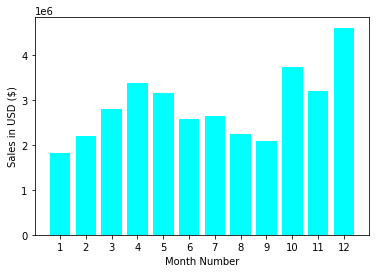

In [23]:
months = range(1,13)

plt.bar(months, results['Sales'], color='#00ffff')
plt.xticks(months)
plt.xlabel("Month Number")
plt.ylabel("Sales in USD ($)")

plt.show()

### What US city had highest number of Sales?

In [24]:
all_data['City'] = all_data['Purchase Address'].apply(lambda x: x.split(',')[1] + ' ' + x.split(',')[2].split(' ')[1])
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Time,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19,"917 1st St, Dallas, TX 75001",08:46,4,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19,"682 Chestnut St, Boston, MA 02215",22:30,4,99.99,Boston MA
3,176560,Google Phone,1,600.00,04/12/19,"669 Spruce St, Los Angeles, CA 90001",14:38,4,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,04/12/19,"669 Spruce St, Los Angeles, CA 90001",14:38,4,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,04/30/19,"333 8th St, Los Angeles, CA 90001",09:27,4,11.99,Los Angeles CA
...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19,"840 Highland St, Los Angeles, CA 90001",20:56,9,8.97,Los Angeles CA
186846,259354,iPhone,1,700.00,09/01/19,"216 Dogwood St, San Francisco, CA 94016",16:00,9,700.00,San Francisco CA
186847,259355,iPhone,1,700.00,09/23/19,"220 12th St, San Francisco, CA 94016",07:39,9,700.00,San Francisco CA
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19,"511 Forest St, San Francisco, CA 94016",17:30,9,379.99,San Francisco CA


In [25]:
results_of_cities = all_data.groupby('City').sum()
results_of_cities

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta GA,16602,2779908.20,104794,2795498.58
Austin TX,11153,1809873.61,69829,1819581.75
Boston MA,22528,3637409.77,141112,3661642.01
Dallas TX,16730,2752627.82,104620,2767975.40
Los Angeles CA,33289,5421435.23,208325,5452570.80
New York City NY,27932,4635370.83,175741,4664317.43
Portland ME,2750,447189.25,17144,449758.27
Portland OR,11303,1860558.22,70621,1870732.34
San Francisco CA,50239,8211461.74,315520,8262203.91


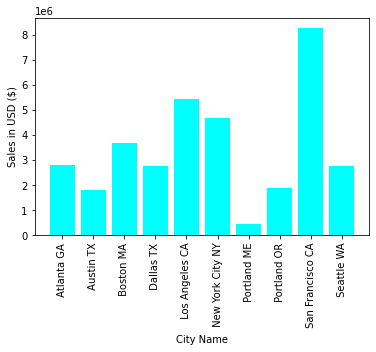

In [26]:
cities = [city for city, df in all_data.groupby('City')]

plt.bar(cities, results_of_cities['Sales'], color='#00ffff')
plt.xticks(cities,rotation ='vertical')
plt.xlabel("City Name")
plt.ylabel("Sales in USD ($)")

plt.show()

### What time should we display advertisements to maximize likelihood of customer's buying product?

In [27]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Time,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19,"917 1st St, Dallas, TX 75001",08:46,4,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19,"682 Chestnut St, Boston, MA 02215",22:30,4,99.99,Boston MA
3,176560,Google Phone,1,600.00,04/12/19,"669 Spruce St, Los Angeles, CA 90001",14:38,4,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,04/12/19,"669 Spruce St, Los Angeles, CA 90001",14:38,4,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,04/30/19,"333 8th St, Los Angeles, CA 90001",09:27,4,11.99,Los Angeles CA
...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19,"840 Highland St, Los Angeles, CA 90001",20:56,9,8.97,Los Angeles CA
186846,259354,iPhone,1,700.00,09/01/19,"216 Dogwood St, San Francisco, CA 94016",16:00,9,700.00,San Francisco CA
186847,259355,iPhone,1,700.00,09/23/19,"220 12th St, San Francisco, CA 94016",07:39,9,700.00,San Francisco CA
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19,"511 Forest St, San Francisco, CA 94016",17:30,9,379.99,San Francisco CA


In [28]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])
all_data['Order Time'] = pd.to_datetime(all_data['Order Time'])

In [29]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Time,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19,"917 1st St, Dallas, TX 75001",2022-03-14 08:46:00,4,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07,"682 Chestnut St, Boston, MA 02215",2022-03-14 22:30:00,4,99.99,Boston MA
3,176560,Google Phone,1,600.00,2019-04-12,"669 Spruce St, Los Angeles, CA 90001",2022-03-14 14:38:00,4,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,2019-04-12,"669 Spruce St, Los Angeles, CA 90001",2022-03-14 14:38:00,4,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,2019-04-30,"333 8th St, Los Angeles, CA 90001",2022-03-14 09:27:00,4,11.99,Los Angeles CA
...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17,"840 Highland St, Los Angeles, CA 90001",2022-03-14 20:56:00,9,8.97,Los Angeles CA
186846,259354,iPhone,1,700.00,2019-09-01,"216 Dogwood St, San Francisco, CA 94016",2022-03-14 16:00:00,9,700.00,San Francisco CA
186847,259355,iPhone,1,700.00,2019-09-23,"220 12th St, San Francisco, CA 94016",2022-03-14 07:39:00,9,700.00,San Francisco CA
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19,"511 Forest St, San Francisco, CA 94016",2022-03-14 17:30:00,9,379.99,San Francisco CA


In [30]:
all_data['Hour']= all_data['Order Time'].dt.hour

In [31]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Time,Month,Sales,City,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19,"917 1st St, Dallas, TX 75001",2022-03-14 08:46:00,4,23.90,Dallas TX,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07,"682 Chestnut St, Boston, MA 02215",2022-03-14 22:30:00,4,99.99,Boston MA,22
3,176560,Google Phone,1,600.00,2019-04-12,"669 Spruce St, Los Angeles, CA 90001",2022-03-14 14:38:00,4,600.00,Los Angeles CA,14
4,176560,Wired Headphones,1,11.99,2019-04-12,"669 Spruce St, Los Angeles, CA 90001",2022-03-14 14:38:00,4,11.99,Los Angeles CA,14
5,176561,Wired Headphones,1,11.99,2019-04-30,"333 8th St, Los Angeles, CA 90001",2022-03-14 09:27:00,4,11.99,Los Angeles CA,9
...,...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17,"840 Highland St, Los Angeles, CA 90001",2022-03-14 20:56:00,9,8.97,Los Angeles CA,20
186846,259354,iPhone,1,700.00,2019-09-01,"216 Dogwood St, San Francisco, CA 94016",2022-03-14 16:00:00,9,700.00,San Francisco CA,16
186847,259355,iPhone,1,700.00,2019-09-23,"220 12th St, San Francisco, CA 94016",2022-03-14 07:39:00,9,700.00,San Francisco CA,7
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19,"511 Forest St, San Francisco, CA 94016",2022-03-14 17:30:00,9,379.99,San Francisco CA,17


In [32]:
all_data.groupby('Hour').sum()

,Quantity Ordered,Price Each,Month,Sales
Hour,,,,
0,4428,709296.70,27554,713721.27
1,2619,458490.00,16657,460866.88
2,1398,233833.64,8507,234851.44
3,928,144726.42,5904,145757.89
4,937,162058.18,6148,162661.01
5,1493,229621.21,9301,230679.82
6,2810,445000.11,17539,448113.00
7,4556,740568.11,28850,744854.12
8,7002,1185970.62,43626,1192348.97


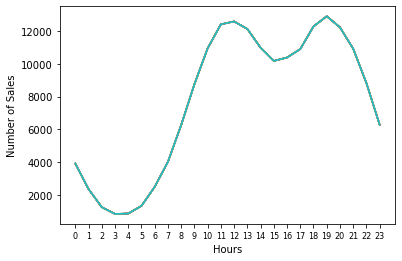

In [33]:
hours = [hour for hour, df in all_data.groupby('Hour')]

plt.plot(hours, all_data.groupby(['Hour']).count())
plt.xticks(hours, size = 8)
plt.xlabel('Hours')
plt.ylabel('Number of Sales')
plt.show()

### What products are most often sold together?

In [34]:
df = all_data[all_data[ 'Order ID'].duplicated(keep= False)]

df['Grouped'] = all_data.groupby('Order ID')['Product'].transform(lambda x:','.join(x))
df = df[['Order ID', 'Grouped']].drop_duplicates()
df

C:\Users\harsh\AppData\Local\Temp/ipykernel_16240/1548759635.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = all_data.groupby('Order ID')['Product'].transform(lambda x:','.join(x))


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
...,...,...
186781,259296,"Apple Airpods Headphones,Apple Airpods Headphones"
186783,259297,"iPhone,Lightning Charging Cable,Lightning Char..."
186791,259303,"34in Ultrawide Monitor,AA Batteries (4-pack)"
186803,259314,"Wired Headphones,AAA Batteries (4-pack)"


In [35]:
# Referenced: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)


('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


### What product sold the most and why?

In [36]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Time,Month,Sales,City,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19,"917 1st St, Dallas, TX 75001",2022-03-14 08:46:00,4,23.90,Dallas TX,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07,"682 Chestnut St, Boston, MA 02215",2022-03-14 22:30:00,4,99.99,Boston MA,22
3,176560,Google Phone,1,600.00,2019-04-12,"669 Spruce St, Los Angeles, CA 90001",2022-03-14 14:38:00,4,600.00,Los Angeles CA,14
4,176560,Wired Headphones,1,11.99,2019-04-12,"669 Spruce St, Los Angeles, CA 90001",2022-03-14 14:38:00,4,11.99,Los Angeles CA,14
5,176561,Wired Headphones,1,11.99,2019-04-30,"333 8th St, Los Angeles, CA 90001",2022-03-14 09:27:00,4,11.99,Los Angeles CA,9


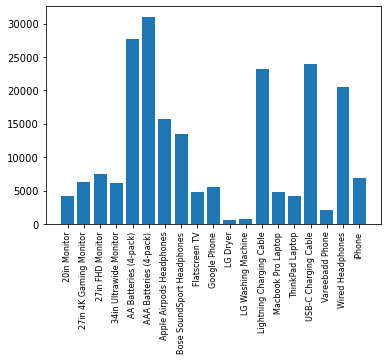

In [43]:
# product_grouped = all_data.groupby('Product').sum()

# product_grouped['Quantity Ordered']

product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']
products = [product for product, df in product_group]
plt.bar(products, quantity_ordered)
plt.xticks(products, rotation='vertical', size=8)
plt.ylabel("Quantity Ordered")
plt.show()

C:\Users\harsh\AppData\Local\Temp/ipykernel_16240/1017169292.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical', size=8)


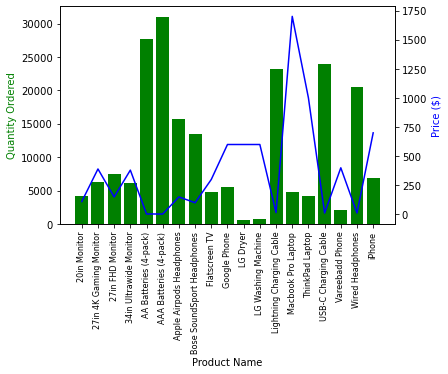

In [47]:
prices = all_data.groupby('Product').mean()['Price Each']
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar (products, quantity_ordered, color='g')
ax2.plot(products, prices, 'b-')
ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(products, rotation='vertical', size=8)
plt.show()